_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Lösungen zu Übung 05 - Allgemein: Daten einlesen, bereinigen und mit Histogrammen visualisieren

<a name="top"></a>Inhalt
---
* [Daten beschaffen](#daten_beschaffen)
* [Daten erkunden](#daten_erkunden)
* [Daten bereinigen](#daten_bereinigen)
* [Histogramme](#histogramme)

<a name="daten_beschaffen"></a>1. Daten beschaffen
---
**1.A** Datenquellen:
* ["normale" Twitter-User](http://help.sentiment140.com/for-students/) Diese Daten wurden eigentlich für eine sog. "sentiment Analyse", also eine Analyse der Gefühlslage des Twitter-Nutzers gesammelt. Außerdem sind die Daten auch nicht Open Source. Deshalb stellen wir die Daten nicht selbst zur Verfügung sondern verlassen uns darauf, dass die Studierenden sie sich selbst herunterladen. Die Methode, die der Datensammlung zu Grunde liegt, wird in [dieser Publikation](https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf) beschrieben. 
* [Donald Trump](https://github.com/mkearney/trumptweets) zur Datenquelle der Trump-Tweets gibt es keine genauere Dokumentation. Das sollte uns das hellhörig werden lassen und darauf hinweisen, dass die Datenquelle nicht unbedingt vertrauenswürdig ist. Eine Alternative wäre, die entsprechenden Tweets selbst zu sammeln.
* [russische Trolle](https://github.com/fivethirtyeight/russian-troll-tweets/) Eine sehr gute Beschreibung des Datensatzes sowie der Methoden die angewandt wurden, um die Trolle zu identifizieren gibt es auf dem [GitHub Profil](https://github.com/fivethirtyeight/russian-troll-tweets/) des Projektes. Zum besseren Verständnis der Bedeutung des Datensatzes bietet sich auch [dieser](https://fivethirtyeight.com/features/why-were-sharing-3-million-russian-troll-tweets/) Artikel an.

In [2]:
# 1.B
# benötigte Bibliotheken
import pandas as pd 
import requests 
import io

# unter diesem Pfad ist der Datensatz mit den "normalen" Tweets gespeichert
pfad_normal = 'daten/trainingandtestdata/training.1600000.processed.noemoticon.csv'
tweets_normal_raw = pd.read_csv(pfad_normal, \
                            names=['sentiment','ID','Date','Query','User','Tweet'],\
                            encoding="ISO-8859-1")

# die URL unter der der Trump-Tweet-Datensatz zu finden ist
url_trump = "https://github.com/mkearney/trumptweets/raw/master/data/trumptweets-1515775693.tweets.csv"

# lies die Information von der in der URL hinterlegten Website aus
# und speichere sie in einem DataFrame. 
# Diesmal geben wir das encoding schon an dieser Stelle an
antwort_trump = requests.get(url_trump).content
inhalt_trump = io.StringIO(antwort_trump.decode('ISO-8859-1'))
tweets_trump_raw = pd.read_csv(inhalt_trump)

# die URL unter der der Troll-Tweet-Datensatz zu finden ist
url_troll = 'https://github.com/fivethirtyeight/russian-troll-tweets/raw/master/IRAhandle_tweets_1.csv'

# lies die Information von der in der URL hinterlegten Website aus
# und speichere sie in einem DataFrame. 
# Diesmal geben wir das encoding schon an dieser Stelle an
antwort_troll = requests.get(url_troll).content
inhalt_troll = io.StringIO(antwort_troll.decode('ISO-8859-1'))
tweets_troll_raw = pd.read_csv(inhalt_troll)

/home/jlasser/virtualenvs/p3.5_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,30,31,32,36,37,38,42,43,44,45,46,47,50,51,52,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[Anfang](#top)

<a name="daten_beschaffen"></a>2. Daten erkunden
---

In [3]:
# 2.A
print('Spaltennamen der normalen Tweets:')
print(tweets_normal_raw.columns)
print()

print('Spaltennamen der Trump Tweets:')
print(tweets_trump_raw.columns)
print()

print('Spaltennamen der Troll Tweets:')
print(tweets_troll_raw.columns)

Spaltennamen der normalen Tweets:
Index(['sentiment', 'ID', 'Date', 'Query', 'User', 'Tweet'], dtype='object')

Spaltennamen der Trump Tweets:
Index(['status_id', 'created_at', 'user_id', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'hashtags', 'symbols', 'urls_url', 'urls_t.co',
       'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url',
       'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description

**Information in den Spalten für den normalen Tweet-Datensatz** (aus der [Dokumentation](http://help.sentiment140.com/for-students/) des Datensatzes):

_The data is a CSV with emoticons removed. Data file format has 6 fields:_
* _0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)_
* _1 - the id of the tweet (2087)_
* _2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)_
* *3 - the query (lyx). If there is no query, then this value is NO_QUERY.*
* _4 - the user that tweeted (robotickilldozr)_
* _5 - the text of the tweet (Lyx is cool)_

**Information in den Spalten für den Troll-Tweet Datensatz** (aus der [Dokumentation](https://github.com/fivethirtyeight/russian-troll-tweets/blob/master/README.md) des Datensatzes):

Header | Definition
---|---------
`external_author_id` | An author account ID from Twitter 
`author` | The handle sending the tweet
`content` | The text of the tweet
`region` | A region classification, as [determined by Social Studio](https://help.salesforce.com/articleView?id=000199367&type=1)
`language` | The language of the tweet
`publish_date` | The date and time the tweet was sent
`harvested_date` | The date and time the tweet was collected by Social Studio
`following` | The number of accounts the handle was following at the time of the tweet
`followers` | The number of followers the handle had at the time of the tweet
`updates` | The number of “update actions” on the account that authored the tweet, including tweets, retweets and likes
`post_type` | Indicates if the tweet was a retweet or a quote-tweet
`account_type` | Specific account theme, as coded by Linvill and Warren
`retweet` | A binary indicator of whether or not the tweet is a retweet
`account_category` | General account theme, as coded by Linvill and Warren
`new_june_2018` | A binary indicator of whether the handle was newly listed in June 2018
`alt_external_id` | Reconstruction of author account ID from Twitter, derived from `article_url` variable and the first list provided to Congress
`tweet_id` | Unique id assigned by twitter to each status update, derived from `article_url`
`article_url` | Link to original tweet. Now redirects to "Account Suspended" page
`tco1_step1` | First redirect for the first http(s)://t.co/ link in a tweet, if it exists
`tco2_step1` | First redirect for the second http(s)://t.co/ link in a tweet, if it exists
`tco3_step1` | First redirect for the third http(s)://t.co/ link in a tweet, if it exists

Zum Trump-Datensatz ist keine explizite Dokumentation des Spalteninhalts vorhanden. Trotzdem sind die meisten Spalten-Namen so deskriptiv gestaltet, dass wir erraten können, welche Information sie enthalten und sie entsprechend verwenden können.

In [4]:
# 2.B
test_index = 10
print('Ein zufälliger normaler User tweetet:')
print(tweets_normal_raw['Tweet'][test_index])
print()
print('Donald Trump tweetet:')
print(tweets_trump_raw['text'][test_index])
print()
print('Ein zufälliger russischer Troll tweetet:')
print(tweets_troll_raw['content'][test_index])

Ein zufälliger normaler User tweetet:
spring break in plain city... it's snowing 

Donald Trump tweetet:
"...these days...we could all use a little of the power of Trumpative thinking." âBarnesandNoble.com http://tinyurl.com/pqpfvm

Ein zufälliger russischer Troll tweetet:
After the 'genocide' remark from San Juan Mayor the narrative has changed though. @CNN fixes its reporting constantly.


In [5]:
# 2.C
# normale User
number_of_tweets_normal = len(tweets_normal_raw)
unique_users_normal = len(tweets_normal_raw.User.unique())
print('Anzahl der normalen User: {}'.format(unique_users_normal))
print('Anzahl der Tweets im normalen Datensatz: {}'.format(number_of_tweets_normal))
print()

# Trump
number_of_tweets_trump = len(tweets_trump_raw)
unique_users_trump = len(tweets_trump_raw.screen_name.unique())
print('Anzahl der User im Trum-Datensatz: {}'.format(unique_users_trump))
print('Anzahl der Tweets im Trump-Datensatz: {}'.format(number_of_tweets_trump))

Anzahl der normalen User: 659775
Anzahl der Tweets im normalen Datensatz: 1600000

Anzahl der User im Trum-Datensatz: 5
Anzahl der Tweets im Trump-Datensatz: 32826


In [6]:
# man würde bei einem Datensatz von Tweets von Donald Trump jetzt erst
# einmal erwarten, dass nur ein User (nämlich Trump) im Datensatz enthalten ist.
# Deswegen verwundert es etwas, dass es 5 verschiedene User sind. Welche
# User sind denn das?
print(tweets_trump_raw.screen_name.unique())

['realDonaldTrump' 'TeamTrump' 'EricTrump' 'DanScavino' 'DonaldJTrumpJr']


In [7]:
# 2.D
# Trolle
number_of_tweets_troll = len(tweets_troll_raw)
unique_users_troll = len(tweets_troll_raw.author.unique())

# normale user haben wir schon in 2.C berechnet

print('Anzahl der Tweets / User für die normalen Tweets: {:1.2f}'.format(number_of_tweets_normal / unique_users_normal))
print('Anzahl der Tweets / User für die Trolle: {:1.2f}'.format(number_of_tweets_troll / unique_users_troll))

Anzahl der Tweets / User für die normalen Tweets: 2.43
Anzahl der Tweets / User für die Trolle: 818.43


In [8]:
# 2.E
# der Modus gibt Auskunft über den Eintrag, der
# am häufigsten vorkommt
most_active_user = tweets_troll_raw['author'].mode()
print('Der aktivste Troll-Account im Datensatz ist:')
print(most_active_user)
print()

# filtere das DataFrame nach Einträgen, die vom User
# "AMELIEBALDWIN" stammen
filter_most_active = tweets_troll_raw['author'] == 'AMELIEBALDWIN'
number_most_active = filter_most_active.sum()
print('Der aktivste Troll Account hat {} Tweets abgesetzt.'.format(number_most_active))
print('Das sind {:1.2f}% der Tweets im ganzen Datensatz.'\
      .format(number_most_active / len(tweets_troll_raw) * 100))

Der aktivste Troll-Account im Datensatz ist:
0    AMELIEBALDWIN
dtype: object

Der aktivste Troll Account hat 35261 Tweets abgesetzt.
Das sind 14.46% der Tweets im ganzen Datensatz.


In [9]:
# 2.F
# die verschiedenen Einträge der Spalte "language"
sprachen = tweets_troll_raw.language.unique()
print(sprachen)
print()

# ziehe 1 ab für 'LANGUAGE UNDEFINED'
print('Der Datensatz enthält Tweets in {} verschiedenen Sprachen.'\
     .format(len(sprachen) - 1))

['English' 'Russian' 'Serbian' 'Ukrainian' 'Tagalog (Filipino)' 'Albanian'
 'Italian' 'Romanian' 'Spanish' 'Catalan' 'German' 'Estonian' 'French'
 'Norwegian' 'Vietnamese' 'Dutch' 'Arabic' 'Uzbek' 'Bulgarian'
 'Macedonian' 'Farsi (Persian)' 'Turkish' 'LANGUAGE UNDEFINED' 'Czech'
 'Somali' 'Lithuanian' 'Croatian' 'Slovak' 'Icelandic' 'Slovenian'
 'Japanese' 'Indonesian' 'Pushto' 'Hungarian' 'Finnish' 'Latvian'
 'Portuguese' 'Danish' 'Swedish' 'Malay' 'Polish' 'Korean' 'Hebrew' 'Urdu'
 'Kurdish' 'Hindi' 'Greek' 'Simplified Chinese' 'Thai']

Der Datensatz enthält Tweets in 48 verschiedenen Sprachen.


In [10]:
# 2.F Fortsetzung

# erstelle ein Dictionary mit einem Eintrag für jede Sprache
# und einem Counter (der zu Anfang gleich null ist).
sprachen = {s:0 for s in sprachen}

# Im Folgenden iterieren wir über jeden Tweet im Datensatz 
# und erhöhen den Counter für die entsprechende Sprache um 1
for index, row in tweets_troll_raw.iterrows():
    # finde die Tweet-Sprache heraus
    tweet_sprache = row['language']
    # erhöhe den Counter der Sprache im Dictionary um 1
    sprachen[tweet_sprache] = sprachen[tweet_sprache] + 1 

[Anfang](#top)

<a name="daten_bereinigen"></a>3. Daten bereinigen
---

In [14]:
# 3.A
# bereinige die Trump Tweets (Wiederholung aus Übungsblatt)
mask_realDonald = tweets_trump_raw['screen_name'] == 'realDonaldTrump'
tweets_trump_filtered = tweets_trump_raw[mask_realDonald]
tweets_trump = pd.DataFrame({'Date':tweets_trump_filtered['created_at'],\
                             'User':tweets_trump_filtered['screen_name'],\
                             'Tweet':tweets_trump_filtered['text']})

# normale user
tweets_normal = pd.DataFrame({'Date':tweets_normal_raw['Date'],\
                             'User':tweets_normal_raw['User'],\
                             'Tweet':tweets_normal_raw['Tweet']})

In [15]:
# 3.B
# Trolle
tweets_troll = pd.DataFrame({'Date':tweets_troll_raw['publish_date'],\
                             'User':tweets_troll_raw['author'],\
                             'Tweet':tweets_troll_raw['content'],\
                             'Language':tweets_troll_raw['language'],\
                             'Follower':tweets_troll_raw['followers'],\
                             'Following':tweets_troll_raw['following']})
tweets_troll.head()

,Date,Follower,Following,Language,Tweet,User
0,10/1/2017 19:58,9636,1052,English,"""We have a sitting Democrat US Senator on tria...",10_GOP
1,10/1/2017 22:43,9637,1054,English,Marshawn Lynch arrives to game in anti-Trump s...,10_GOP
2,10/1/2017 22:50,9637,1054,English,Daughter of fallen Navy Sailor delivers powerf...,10_GOP
3,10/1/2017 23:52,9642,1062,English,JUST IN: President Trump dedicates Presidents ...,10_GOP
4,10/1/2017 2:13,9645,1050,English,"19,000 RESPECTING our National Anthem! #StandF...",10_GOP


In [28]:
# 3.C

# url der Troll tweets, diesmal mit einem Platzhalter "{}" für die Zahl
url_troll = 'https://github.com/fivethirtyeight/russian-troll-tweets/raw/master/IRAhandle_tweets_{}.csv'
# Liste, in der wir alle heruntergeladenen Troll-Tweets speichern
all_troll_tweets_raw = []

# iteriere über die Zahlen 1 bis 13, um alle 13 Teile des Datensatzes herunterzuladen
for i in range(1, 14):
    url_troll = url_troll.format(i)
    antwort_troll = requests.get(url_troll).content
    inhalt_troll = io.StringIO(antwort_troll.decode('ISO-8859-1'))
    tweets = pd.read_csv(inhalt_troll)
    # füge den Datensatz-Teil der Liste hinzu
    all_troll_tweets_raw.append(tweets)
    print('Der {}. Datensatzteil beinhaltet {} Tweets.'.format(i, len(tweets)))
    
# Die Tweets liegen alphabetisch sortiert nach User-name vor. 
# Alle Teile des Datensatzes beinhalten genau 243891 Tweets 

Der 1. Datensatzteil beinhaltet 243891 Tweets.
Der 2. Datensatzteil beinhaltet 243891 Tweets.
Der 3. Datensatzteil beinhaltet 243891 Tweets.
Der 4. Datensatzteil beinhaltet 243891 Tweets.
Der 5. Datensatzteil beinhaltet 243891 Tweets.
Der 6. Datensatzteil beinhaltet 243891 Tweets.
Der 7. Datensatzteil beinhaltet 243891 Tweets.
Der 8. Datensatzteil beinhaltet 243891 Tweets.
Der 9. Datensatzteil beinhaltet 243891 Tweets.
Der 10. Datensatzteil beinhaltet 243891 Tweets.
Der 11. Datensatzteil beinhaltet 243891 Tweets.
Der 12. Datensatzteil beinhaltet 243891 Tweets.
Der 13. Datensatzteil beinhaltet 243891 Tweets.


In [29]:
# erstelle aus den Teilen ein einziges DataFrame
all_troll_tweets_raw = pd.concat(all_troll_tweets_raw)

In [32]:
# bereinige das DataFrame
tweets_troll_all = pd.DataFrame({'Date':all_troll_tweets_raw['publish_date'],\
                             'User':all_troll_tweets_raw['author'],\
                             'Tweet':all_troll_tweets_raw['content'],\
                             'Language':all_troll_tweets_raw['language'],\
                             'Follower':all_troll_tweets_raw['followers'],\
                             'Following':all_troll_tweets_raw['following']})

print('Der gesamte Datensatz beinhaltet {} Tweets.'.format(len(tweets_troll_all)))
tweets_troll_all.head()

Der gesamte Datensatz beinhaltet 3170583 Tweets.


,Date,Follower,Following,Language,Tweet,User
0,10/1/2017 19:58,9636,1052,English,"""We have a sitting Democrat US Senator on tria...",10_GOP
1,10/1/2017 22:43,9637,1054,English,Marshawn Lynch arrives to game in anti-Trump s...,10_GOP
2,10/1/2017 22:50,9637,1054,English,Daughter of fallen Navy Sailor delivers powerf...,10_GOP
3,10/1/2017 23:52,9642,1062,English,JUST IN: President Trump dedicates Presidents ...,10_GOP
4,10/1/2017 2:13,9645,1050,English,"19,000 RESPECTING our National Anthem! #StandF...",10_GOP


In [88]:
# 3.D
# importiere die Bibliothek datetime
import datetime

# definiere die Funktion "clean_date", die als Input
# einen String bekommt, der eine Datums- und Zeitangabe
# enthält, sowie den typ (trump, normal, troll) des Inputs,
# um den String entsprechend zu formatieren
def clean_date(date_time_raw, typ):
    
    # dictionary in dem jeder Monatsabkürzung eine Ganzzahl
    # zugewiesen wird (im normalen Tweet Datensatz liegen die
    # Monatsangaben als String vor)
    month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,\
                 'May':5, 'Jun':6, 'Jul':7, 'Aug':8,\
                 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
    
    # überprüfe den Typ der Eingabe
    # Timestamps aus dem Troll-Datensatz folgen dem
    # Muster "monat/tag/jahr stunde:minute"
    if typ == 'troll':
        # teile den String entlang des Leerzeichens in Datum und Zeit
        date, time = date_time_raw.split(' ')
        # teile das Datum entlang des forward-slash in Monat, Tag und Jahr
        month, day, year = date.split('/')
        # teile die Zeit entlang des Doppelpunktes in Stunde und Minute
        hour, minute = time.split(':')
    
    # Timestamps aus dem normalen Datensatz folgen dem
    # Muster "weekday month day hour:minute:second timezone year"
    elif typ == 'normal':
        # teile den String entlang des Leerzeichens in Wochentag,
        # Monat (String-Abkürzung), Tag, Zeit, Zeitzone und Jahr
        weekday, month, day, time, zone, year = date_time_raw.split(' ')
        # teile die Zeit entlang des Doppelpunktes in Stunde, Minute und Sekunde
        hour, minute, second = time.split(':')
        # konvertiere die Monatsangabe mit dem "month_dict" in eine Zahl
        month = month_dict[month]
    
    # Timestamps aus dem Trump-Datensatz folgen dem
    # Muster "year-month-day hour:minute:second"
    elif typ == 'trump':
        # teile den String entlang des Leerzeichens in Datum und Zeit
        date, time = date_time_raw.split(' ')
        # teile das Datum entlang des Bindestrichs in Jahr, Monat und Tag
        year, month, day = date.split('-')
        # teile die Zeit entlang des Doppelpunktes in Stunde, Minute und Sekunde
        hour, minute, second = time.split(':')
    
    # falls die Funktion mit einem unbekannten Typ benutzt
    # wird, geben wir eine Fehlermeldung aus und "None" zurück
    else:
        print('unknown Tweet type!')
        return None
    
    # wir verwandeln Jahr, Monat, Tag, Stunde und Minute in Ganzzahlen
    # da der Datensatz mit den Troll-Tweets keine Informationen über die
    # Sekunden enthält, lassen wir die Sekunden weg und geben uns mit
    # einer minuten-genauen Auflösung der Zeit zufrieden
    year = int(year)
    month = int(month)
    day = int(day)
    hour = int(hour)
    minute = int(minute)
    
    # erstelle ein datetime-Objekt aus Datum und Zeit
    date_time = datetime.datetime(year, month, day, hour, minute)
    
    # gib das datetime-Objekt zurück
    return date_time
        

In [ ]:
# teste die Funktion mit Einträgen aus allen drei Datensätzen
trump_test = tweets_trump.loc[0]['Date']
normal_test = tweets_normal.loc[0]['Date']
troll_test = tweets_troll.loc[0]['Date']

clean_trump = clean_date(trump_test, 'trump')
print(clean_trump)
clean_normal = clean_date(normal_test, 'normal')
print(clean_normal)
clean_troll = clean_date(troll_test, 'troll')
print(clean_troll)

In [89]:
# konvertiere alle Datumsangaben in den drei Datensätzen in datetime-Objekte
tweets_trump['Date'] = tweets_trump['Date'].apply(clean_date, args=['trump'])
tweets_normal['Date'] = tweets_normal['Date'].apply(clean_date, args=['normal'])
tweets_troll['Date'] = tweets_troll['Date'].apply(clean_date, args=['troll'])

AttributeError: 'Timestamp' object has no attribute 'split'

In [95]:
# jetzt können wir mit den Datumsangaben ganz einfach rechnen:
# wir bekommen als Ergebnis ein timedelta-Objekt zurück
tweets_trump.loc[0]['Date'] - tweets_trump.loc[4]['Date']

Timedelta('-180 days +01:23:00')

In [33]:
# 3.E

# definiere die Funktion "calculate_length", die ein
# DataFrame "df" übergeben bekommt
def calculate_tweet_length(df):
    
    # Liste, in der die Tweet-Längen gespeichert werden
    length = []
    
    # Iteriere über alle Tweets
    for tweet in df['Tweet']:
        # füge Tweet-Länge der Liste hinzu
        length.append(len(tweet))

    # erstelle eine neue Spalte im DataFrame "df",
    # indem der (zuvor noch nicht existenten) Spalte
    # mit dem namen "tweet_length" die Liste "length"
    # zugewiesen wird
    df['tweet_length'] = length
    
# wende die oben definierte Funktion auf alle DataFrames an
calculate_tweet_length(tweets_normal)
calculate_tweet_length(tweets_trump)
calculate_tweet_length(tweets_troll)
calculate_tweet_length(tweets_troll_all)

In [35]:
# 3.F
def calculate_word_number(df):
    
    # Liste, in der die Wort-Längen gespeichert werden
    word_number = []
    
    # Iteriere über alle Tweets
    for tweet in df['Tweet']:
        # wir gehen davon aus, dass einzelne Worte durch
        # Leerzeichen getrennt werden
        words = tweet.split(' ')
        word_number.append(len(words))

    # erstelle eine neue Spalte im DataFrame "df",
    # indem der (zuvor noch nicht existenten) Spalte
    # mit dem namen "word_number" die Liste word_number
    # zugewiesen wird
    df['word_number'] = word_number
    
calculate_word_number(tweets_normal)
calculate_word_number(tweets_trump)
calculate_word_number(tweets_troll)
calculate_word_number(tweets_troll_all)

In [37]:
# der Datensatz hat jetzt die beiden neuen Spalten "tweet_length"
# und "word_number"
tweets_normal.head()

,Date,Tweet,User,tweet_length,word_number
0,Mon Apr 06 22:19:45 PDT 2009,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",_TheSpecialOne_,115,20
1,Mon Apr 06 22:19:49 PDT 2009,is upset that he can't update his Facebook by ...,scotthamilton,111,22
2,Mon Apr 06 22:19:53 PDT 2009,@Kenichan I dived many times for the ball. Man...,mattycus,89,19
3,Mon Apr 06 22:19:57 PDT 2009,my whole body feels itchy and like its on fire,ElleCTF,47,11
4,Mon Apr 06 22:19:57 PDT 2009,"@nationwideclass no, it's not behaving at all....",Karoli,111,22


In [96]:
# 3.G
tweets_normal.to_csv('daten/tweets_normal.csv', encoding='ISO-8859-1')
tweets_trump.to_csv('daten/tweets_trump.csv', encoding='ISO-8859-1')
tweets_troll.to_csv('daten/tweets_troll.csv', encoding='ISO-8859-1')
tweets_troll_all.to_csv('daten/tweets_troll_all.csv', encoding='ISO-8859-1')

[Anfang](#top)

<a name="daten_beschaffen"></a>4. Histogramme
---

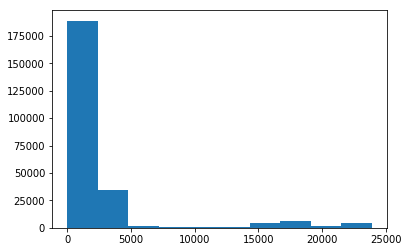

In [41]:
# 4.A
# importiere das Untermodul pyplot aus der Bibliothek
# matplotlib zum darstellen von Grafiken
import matplotlib.pyplot as plt
# mit diesem Kommando teilen wir dem Jupyter-Notebook mit,
# dass es Grafiken direkt im Notebook anzeigen soll
%matplotlib inline

# erstelle ein einfaches Histogram der Follower der Troll-Accounts
plt.hist(tweets_troll['Follower']);

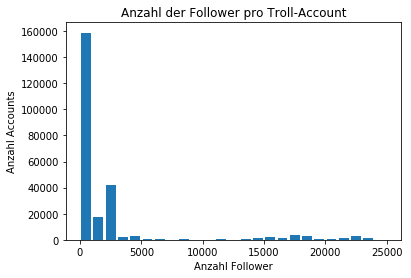

In [43]:
# 4.Ba
# die Werte liegen alle in einem Bereich von 0 bis 25000 Tweets
# indem wir die "range" entsprechend festlegen und die Anzahl der Bins
# auf 25 setzen, liegen die einzelnen Bins zwischen "glatten" Vielfachen
# von 1000. Das ist anschaulich in einfach zu interpretieren. Diese 
# Darstellung lässt z.B. direkt ablesen, dass die meisten Accounts
# zwischen 0 und 5000 Follower haben. Allerdings geht auch viel Information
# über den Bereich mit wenigen Followern (0-5000) verloren, da hier alle
# Accounts in einen einzigen bin aggregiert werden

# die rwidth auf einen Wert kleiner 1.0 zu setzen ist auch eine gute Idee,
# da es die einzelen bins in der Darstellung besser voneinander abgrenzt.

# Histogram
plt.hist(tweets_troll['Follower'], range=[0,25000], bins=25, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Follower')
plt.ylabel('Anzahl Accounts')
plt.title('Anzahl der Follower pro Troll-Account');

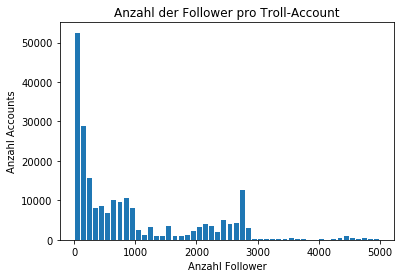

In [45]:
# 4.Bb
# um den Bereich zwischen 0 und 5000 genauer zu betrachten, setzen wir die
# range entsprechend und schrauben die Anzahl der bins nach oben:

# Histogram
plt.hist(tweets_troll['Follower'], range=[0,5000], bins=50, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Follower')
plt.ylabel('Anzahl Accounts')
plt.title('Anzahl der Follower pro Troll-Account');

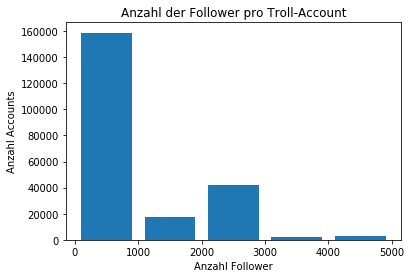

In [47]:
# 3.C wenige bins
# hier geht (wie schon oben beschrieben) viel Information verloren

# Histogram
plt.hist(tweets_troll['Follower'], range=[0,5000], bins=5, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Follower')
plt.ylabel('Anzahl Accounts')
plt.title('Anzahl der Follower pro Troll-Account');

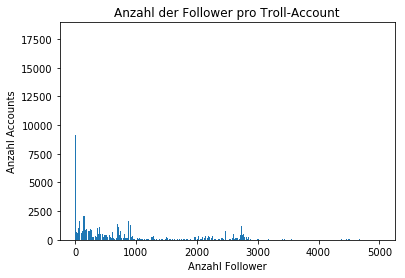

In [49]:
# 3.C viele bins
# hier geht der Vorteil der Aggregierten Information verloren und es
# ist schwierig, aus der Darstellung allgemeinere Erkenntnisse zu extrahieren

# Histogram
plt.hist(tweets_troll['Follower'], range=[0,5000], bins=1000, rwidth=0.8)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl Follower')
plt.ylabel('Anzahl Accounts')
plt.title('Anzahl der Follower pro Troll-Account');

# ein guter Wert für den Bereich 0-5000 Follower ist (wie in 3.B) z.B. bins=50

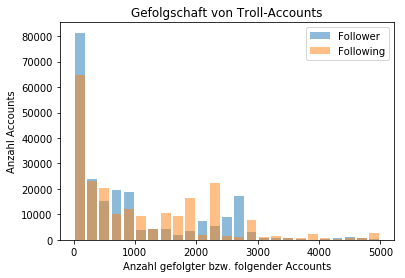

In [55]:
# 3.D

# Um die beiden plots zu vergleichen ist es hilfreich, range und bins
# jeweils gleich zu wählen.

# Um die Lesbarkeit der Visualisierung zu verbesern, setzen wir den
# alpha-wert (Durchsichtigkeit) der Balken auf 50% - da sonst die
# größeren Balken die dahinterliegenden Balken verdecken

# HINWEIS: mit dem Argument "label" weisen wir jedem der beiden
# Histogramme einen "Namen" zu, der später in der Legende aufscheint

# Histogramm der Follower
plt.hist(tweets_troll['Follower'], range=[0,5000], bins=25, rwidth=0.8, \
         alpha=0.5, label='Follower')

# Histogram der gefolgten Accounts
plt.hist(tweets_troll['Following'], range=[0,5000], bins=25, rwidth=0.8, \
         alpha=0.5, label='Following')

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl gefolgter bzw. folgender Accounts')
plt.ylabel('Anzahl Accounts')
plt.title('Gefolgschaft von Troll-Accounts');

# Legende
plt.legend();

# Die Struktur der Verteilung der gefolgen Accounts sieht auf den Ersten Blick
# aus, wie die der folgenden Accounts (viele im niedrigen hunderter Bereich, 
# wenige im hohen tausender Berech).
# Passen wir die range an, um uns den niedrigen tausender Bereich anzusehen, 
# lässt sich ein leichter Trend erkennen: Trolle scheinen mehr accounts zu
# folgen als sie Follower haben.

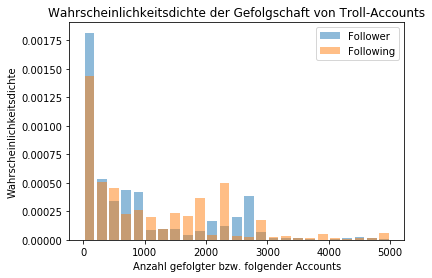

In [57]:
# 3.E (density)
# das Argument "density" verändert die Darstellung der Beobachtungen auf der y-Achse. 
# Vorher war die absolute Anzahl der Beobachtungen abgebildet, mit density=True
# wird die normierte Anzahl der beobachtungen abgebildet, die als Wahrscheinlichkeits-
# dichte interpretiert werden kann

# Histogramm der Follower
plt.hist(tweets_troll['Follower'], range=[0,5000], bins=25, rwidth=0.8, \
         alpha=0.5, label='Follower', density=True)

# Histogram der gefolgten Accounts
plt.hist(tweets_troll['Following'], range=[0,5000], bins=25, rwidth=0.8, \
         alpha=0.5, label='Following', density=True)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl gefolgter bzw. folgender Accounts')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Wahrscheinlichkeitsdichte der Gefolgschaft von Troll-Accounts');

# Legende
plt.legend();

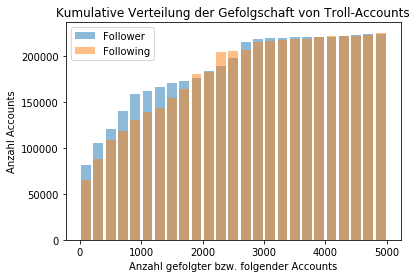

In [58]:
# 3.E (cumulative)
# wenn cumulative=True, dann zeigt jeder bin nicht nur die Anzahl der Beobachtungen
# in ebendiesem bin sondern die Anzahl in dem bin PLUS die Anzahl der Beobachtungen
# in allen Vorangegangenen bins. Die Anzahl der Beobachtungen im letzten Bin entspricht
# also immer der Gesamtanzahl der Beobachtungen.

# Histogramm der Follower
plt.hist(tweets_troll['Follower'], range=[0,5000], bins=25, rwidth=0.8, \
         alpha=0.5, label='Follower', cumulative=True)

# Histogram der gefolgten Accounts
plt.hist(tweets_troll['Following'], range=[0,5000], bins=25, rwidth=0.8, \
         alpha=0.5, label='Following', cumulative=True)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl gefolgter bzw. folgender Accounts')
plt.ylabel('Anzahl Accounts')
plt.title('Kumulative Verteilung der Gefolgschaft von Troll-Accounts');

# Legende
plt.legend();

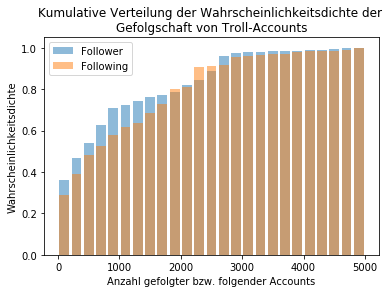

In [60]:
# 3.E (density & cumulative)
# ist sowohl density=True als auch cumulative=True, dann lässt sich schön beobachten,
# dass die Wahrscheinlichkeitsdichte auf 1 normiert ist, dass heißt die kumulierten 
# Wahrscheinlichkeiten, eine Beobachtung in einem Bin zu finden ist im letzten bin gleich 1

# Histogramm der Follower
plt.hist(tweets_troll['Follower'], range=[0,5000], bins=25, rwidth=0.8, \
         alpha=0.5, label='Follower', cumulative=True, density=True)

# Histogram der gefolgten Accounts
plt.hist(tweets_troll['Following'], range=[0,5000], bins=25, rwidth=0.8, \
         alpha=0.5, label='Following', cumulative=True, density=True)

# Achsenbeschriftungen und Titel
plt.xlabel('Anzahl gefolgter bzw. folgender Accounts')
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.title('Kumulative Verteilung der Wahrscheinlichkeitsdichte der \nGefolgschaft von Troll-Accounts');

# Legende
plt.legend();

[Anfang](#top)